# Imports

In [1]:
from os.path import join
import numpy as np
import json

from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
train_annotation_file = "./data/LIVECell_dataset_2021/annotations/LIVECell/livecell_coco_train.json"
val_annotation_file = "./data/LIVECell_dataset_2021/annotations/LIVECell/livecell_coco_val.json"
combined_annotation_file = "./data/LIVECell_dataset_2021/annotations/LIVECell/livecell_coco_train_val.json"

with open(train_annotation_file, 'r') as f:
    train_data = json.load(f)
with open(val_annotation_file, 'r') as f:
    val_data = json.load(f)

combined_data = {
    "images": train_data["images"] + val_data["images"],
    "annotations": train_data["annotations"] + val_data["annotations"],
    "categories": train_data["categories"]
}
with open(combined_annotation_file, 'w') as f:
    json.dump(combined_data, f)

In [3]:
annotations_path = combined_annotation_file
coco = COCO(annotations_path)

loading annotations into memory...
Done (t=14.10s)
creating index...
index created!


# Example

In [4]:
image_dir = "./data/LIVECell_dataset_2021/images/livecell_train_val_images"
# Load an example image ID
image_ids = coco.getImgIds()
example_image_id = image_ids[0]
image_info = coco.loadImgs(example_image_id)[0]

# Load the example image
image_path = join(image_dir, image_info['file_name'])
image = Image.open(image_path).convert('RGB')

In [5]:
# Retrieve annotations for the selected image
annotation_ids = coco.getAnnIds(imgIds=example_image_id)
annotations = coco.loadAnns(annotation_ids)
# Create a blank mask for segmentation
mask = np.zeros((image_info['height'], image_info['width']), dtype=np.uint8)
# Loop through each annotation to create the segmentation mask
for ann in annotations:
    # Decode binary mask
    rle = coco.annToRLE(ann)  # Run-Length Encoding
    binary_mask = maskUtils.decode(rle)
    # Add each cell to the mask, each with a unique label
    mask[binary_mask == 1] = ann['category_id']

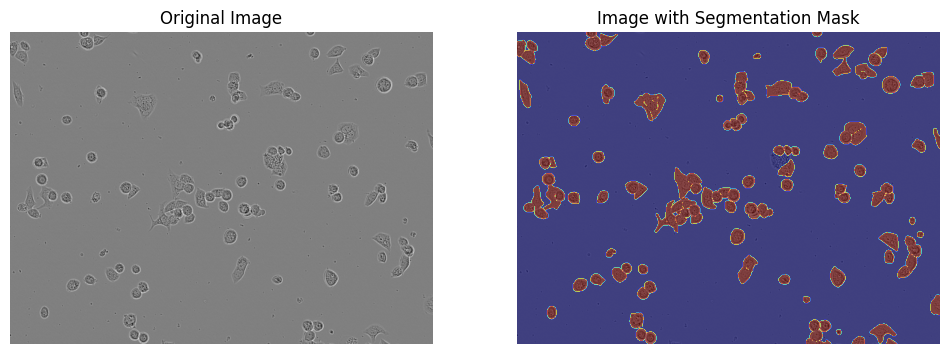

In [6]:
# Display the image and the segmentation mask side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(image)
ax[1].imshow(mask, cmap='jet', alpha=0.5)
ax[1].set_title('Image with Segmentation Mask')
ax[1].axis('off')

plt.show()

# Statistics

In [7]:
num_images = len(coco.getImgIds())
print("Number of images:", num_images)

num_annotations = len(coco.getAnnIds())
print("Number of annotations:", num_annotations)

category_ids = coco.getCatIds()
categories = coco.loadCats(category_ids)
class_names = [category['name'] for category in categories]
num_classes = len(class_names)
print("Number of classes:", num_classes)
print("Class names:", class_names)

Number of images: 3823
Number of annotations: 1200186
Number of classes: 1
Class names: ['cell']


Bounding box area stats (in pixels):
Mean: 473.42
Median: 406.65
Min: 47.22
Max: 1549.83


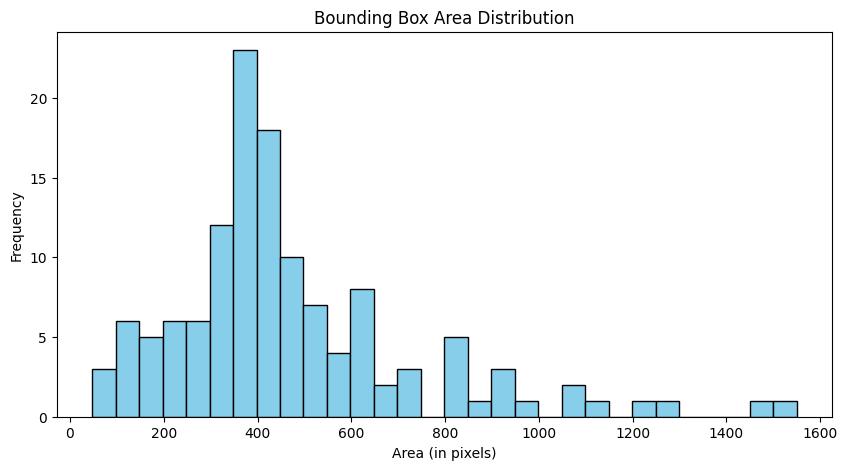

In [8]:
bbox_areas = [ann['bbox'][2] * ann['bbox'][3] for ann in annotations]  # width * height
print("Bounding box area stats (in pixels):")
print(f"Mean: {np.mean(bbox_areas):.2f}")
print(f"Median: {np.median(bbox_areas):.2f}")
print(f"Min: {np.min(bbox_areas):.2f}")
print(f"Max: {np.max(bbox_areas):.2f}")

plt.figure(figsize=(10, 5))
plt.hist(bbox_areas, bins=30, color='skyblue', edgecolor='black')
plt.title("Bounding Box Area Distribution")
plt.xlabel("Area (in pixels)")
plt.ylabel("Frequency")
plt.show()

Segmentation area stats (in pixels):
Mean: 320.17
Median: 301.07
Min: 30.98
Max: 852.41


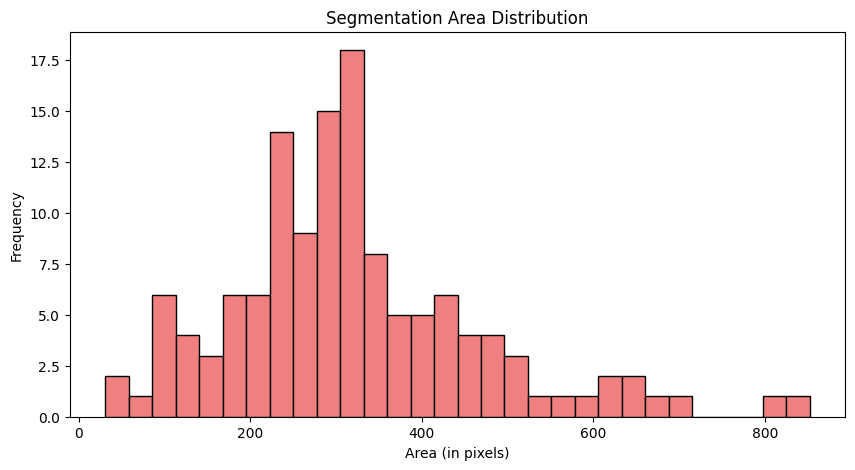

In [9]:
segmentation_areas = [ann['area'] for ann in annotations]
print("Segmentation area stats (in pixels):")
print(f"Mean: {np.mean(segmentation_areas):.2f}")
print(f"Median: {np.median(segmentation_areas):.2f}")
print(f"Min: {np.min(segmentation_areas):.2f}")
print(f"Max: {np.max(segmentation_areas):.2f}")

plt.figure(figsize=(10, 5))
plt.hist(segmentation_areas, bins=30, color='lightcoral', edgecolor='black')
plt.title("Segmentation Area Distribution")
plt.xlabel("Area (in pixels)")
plt.ylabel("Frequency")
plt.show()